In [1]:
# Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload
%autoreload 2

pd.set_option('display.min_row', 25)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_colwidth', 300)

### Possible additional datasets:

- Current Land Use Zoning Detail: https://data.seattle.gov/Land-Base/Current-Land-Use-Zoning-Detail/9nvb-wk9b
- *Bike Rack Locations* (Contains lat&long): https://data.seattle.gov/Land-Base/Bike-Racks/pbej-cxb2
- *Marked Crosswalks* (Contains various, including at signal or stop sign): https://data.seattle.gov/Land-Base/Marked-Crosswalks/dx75-5pzj
- Seattle Light Poles Location (Contains lat&long): https://data.seattle.gov/Land-Base/Seattle-City-Light-Poles/f4y8-37gx
- Traffic Signals (DOES NOT HAVE LAT&LONG) Contains if there is a bike signal or not): https://data.seattle.gov/Land-Base/Traffic-Signals/s63a-bkj8
- *Traffic Circles* (Contains lat&long): https://data.seattle.gov/Land-Base/Traffic-Circles/hw9f-j7b8
- *Radar Speed Signs* (Contains lat&long): https://data.seattle.gov/Land-Base/Radar-Speed-Signs/siht-4gsh

##### Unrelated: 
- Areaways: https://data.seattle.gov/Land-Base/Areaways/nmja-kgz6

In [3]:
streets = pd.read_csv('../data/Seattle_Streets.csv')

In [8]:
streets.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWIDTH,SURFACETYPE_1,SURFACETYPE_2,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYSYS,STREETTYPE,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length
0,1,2.0,1006,10.0,120.0,100120.0,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,,INSVC,1200.0,25.0,NW,N,,,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050
1,2,2.0,1009,10.0,150.0,100150.0,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,,INSVC,1500.0,25.0,NW,N,,,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562
2,3,0.0,1032,15.0,80.0,150080.0,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,,INSVC,800.0,20.0,N,N,,,297.0,0.0,PCC,NaN,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592
3,4,0.0,1051,15.0,230.0,150230.0,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,,INSVC,2200.0,20.0,N,N,,,175.0,25.0,AC,NaN,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983
4,5,0.0,1060,15.0,282.0,150282.0,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,,INSVC,2800.0,20.0,N,N,,,73.0,0.0,PCC,NaN,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708


In [2]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

In [4]:
# set datetime as index
collisions = collisions.set_index('Datetime').sort_index()

In [5]:
collisions.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-06,-122.320755,47.608073,909,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2003/10/06 00:00:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3279003.0,NaN,NaN,NaN,0,0,N
2004-01-01,-122.316863,47.615847,18457,32216,32216,1775182,Matched,Block,NaN,12TH AVE BETWEEN E PINE ST AND E OLIVE ST,NaN,NaN,1,Property Damage Only Collision,Other,5,0,0,2,0,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE",NaN,0,Raining,Dry,Dark - Street Lights On,NaN,4001022.0,NaN,23,From same direction - all others,0,0,N
2004-01-01,NaN,NaN,18014,31860,31860,1789485,Matched,Block,NaN,AURORA AVE N BETWEEN BATTERY ST TUNNEL NB AND THOMAS ST,NaN,NaN,2,Injury Collision,Rear Ended,4,0,0,3,1,0,0,2004/01/01 00:00:00+00,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Wet,Dark - Street Lights On,NaN,4001017.0,Y,13,From same direction - both going straight - both moving - rear-end,0,0,N
2004-01-01,-122.314210,47.664908,10643,24534,24534,1780964,Matched,Intersection,25792.0,BROOKLYN AVE NE AND NE 50TH ST,NaN,NaN,2,Injury Collision,Left Turn,7,0,0,2,2,0,0,2004/01/01 00:00:00+00,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE",NaN,0,Raining,Wet,Daylight,NaN,4001023.0,NaN,28,From opposite direction - one left turn - one straight,0,0,N
2004-01-01,-122.293643,47.721985,3443,16991,16991,1780749,Matched,Block,NaN,LAKE CITY WAY NE BETWEEN NE 127TH ST AND NE 130TH ST,NaN,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2004/01/01 00:00:00+00,Mid-Block (but intersection related),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Raining,Wet,Daylight,NaN,4001005.0,NaN,14,From same direction - both going straight - one stopped - rear-end,0,0,N


In [6]:
collisions['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136964
Injury Collision                   58441
Unknown                            21510
Serious Injury Collision            3077
Fatality Collision                   346
Name: SEVERITYDESC, dtype: int64

In [7]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220338 entries, 2003-10-06 00:00:00 to 2020-07-08 00:00:00
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                212878 non-null  float64
 1   Y                212878 non-null  float64
 2   OBJECTID         220338 non-null  int64  
 3   INCKEY           220338 non-null  int64  
 4   COLDETKEY        220338 non-null  int64  
 5   REPORTNO         220338 non-null  object 
 6   STATUS           220338 non-null  object 
 7   ADDRTYPE         216632 non-null  object 
 8   INTKEY           71472 non-null   float64
 9   LOCATION         215763 non-null  object 
 10  EXCEPTRSNCODE    99935 non-null   object 
 11  EXCEPTRSNDESC    11745 non-null   object 
 12  SEVERITYCODE     220337 non-null  object 
 13  SEVERITYDESC     220338 non-null  object 
 14  COLLISIONTYPE    194186 non-null  object 
 15  PERSONCOUNT      220338 non-null  int64  
 16  PEDC

### Bike Racks

In [19]:
bikeracks = pd.read_csv('../data/Bike_Racks.csv')
bikeracks.head()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,UNITID,UNITTYPE,UNITDESC,BIKE_FACILITY,RACK_CAPACITY,DELINEATOR_POSTS,FINISH_TYPE,SURFACE_TYPE,INSTALL_DATE,MOUNT_TYPE,COLOR,MANUFACTURER,MODEL_TYPE,CONDITION,CONDITION_ASSESSMENT_DATE,SIDE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
0,1.257066e+06,247817.450418,1,639535,16,19236,427.0,-31.0,BKR-3650,BKR,NW MARKET ST 0240 BLOCK N SIDE ( 402) 402 FT W/O 24TH AVE NW,SGL,2,N,GALV,PCC,2016/02/29 00:00:00+00,,,,,GOOD,NaN,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.389310,47.668757
1,1.278455e+06,227063.233437,2,591433,16,14902,125.0,29.0,BKR-3190,BKR,E UNION ST 0240 BLOCK N SIDE ( 112) 112 FT E/O 24TH AVE,CLSTR,6,N,GALV,PCC,2012/11/30 00:00:00+00,SUFMT,,SDOT,BKR-RLRCK,GOOD,2012/10/20 00:00:00+00,N,SDOT,PLANNED,DISTRICT3,,N,NaN,-122.300910,47.613022
2,1.275207e+06,250005.982260,3,518834,16,17262,370.0,-29.0,BKR-520,BKR,NE 65TH ST 0100 BLOCK S SIDE ( 355) 39 FT W/O 12TH AVE NE,SGL,2,N,GALV,PCC,2000/11/12 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,2009/07/30 00:00:00+00,S,SDOT,INSVC,DISTRICT4,,N,NaN,-122.315866,47.675737
3,1.271784e+06,228002.570526,4,519092,16,12225,206.0,17.0,BKR-422,BKR,PINE ST 0120 BLOCK NW SIDE ( 193) 11 FT SW/O MELROSE AVE,SGL,2,N,GALV,PCC,2005/05/18 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,NaN,NW,SDOT,INSVC,DISTRICT3,,N,NaN,-122.328026,47.615245
4,1.263540e+06,253266.784759,5,517282,16,18846,37.0,-17.0,BKR-2280,BKR,NW 76TH ST 0060 BLOCK N SIDE ( 24) 24 FT W/O 6TH AVE NW,SGL,4,N,PAINT,PCC,NaN,SUFMT,BLK,BKR-CORA,BKR-W2704,GOOD,2009/07/31 00:00:00+00,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.363480,47.684049


In [20]:
bikeracks['MOUNT_TYPE'].value_counts()

SUFMT       3202
             519
STBS         219
FREE          10
OTHER          2
CASTINPL       1
Name: MOUNT_TYPE, dtype: int64

In [21]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          3940 non-null   float64
 1   Y                          3940 non-null   float64
 2   OBJECTID                   3953 non-null   int64  
 3   COMPKEY                    3953 non-null   int64  
 4   COMPTYPE                   3953 non-null   int64  
 5   SEGKEY                     3953 non-null   int64  
 6   DISTANCE                   3953 non-null   float64
 7   WIDTH                      3946 non-null   float64
 8   UNITID                     3953 non-null   object 
 9   UNITTYPE                   3953 non-null   object 
 10  UNITDESC                   3953 non-null   object 
 11  BIKE_FACILITY              3953 non-null   object 
 12  RACK_CAPACITY              3953 non-null   int64  
 13  DELINEATOR_POSTS           3953 non-null   objec

### Radar

In [22]:
radar = pd.read_csv('../data/Radar_Speed_Signs.csv')
radar.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,OWNERSHIP,CONDITION,CURRENT_STATUS,OVERRIDEYN,COMPTYPE,SEGKEY,UNITTYPE,BLUE_TOOTH_ENABLED,DATA_COLLECTION_CAPABILITY,SERVICE_POINT,SOLAR_OPERATED,SIDE,SHAPE_LNG,SHAPE_LAT
0,1.260736e+06,257337.873980,1,508865,RSS-1,HOLMAN RD NW 0907 BLOCK NW SIDE ( 110) 110 FT NE/O MARY AVE NW,SDOT,GOOD,INSVC,N,16,10938,RSS,N,N,NaN,Y,NW,-122.375191,47.695054
1,1.276266e+06,258974.658109,2,535585,RSS-20,15TH AVE NE 0980 BLOCK W SIDE ( 0) 0 FT /O NE 100TH ST,SDOT,GOOD,PLANNED,N,16,2072,RSS,Y,Y,NaN,Y,W,-122.312268,47.700376
2,1.291550e+06,189642.035446,3,702898,RSS-51,RAINIER AVE S 1010 BLOCK N SIDE ( 355) 1069 FT W/O 75TH AVE S,,,INSVC,N,16,12438,RSS,N,N,NaN,Y,N,-122.245047,47.511122
3,1.282505e+06,244565.359086,4,678320,RSS-49,NE 45TH ST 0380 BLOCK S SIDE ( 315) 235 FT W/O 40TH AVE NE,,,,N,16,16866,RSS,N,N,NaN,N,S,-122.285830,47.661206
4,1.262416e+06,209772.973835,5,600918,RSS-36,SW GENESEE ST 0250 BLOCK N SIDE ( 10) 10 FT W/O 25TH AVE SW,,,INSVC,N,16,22200,RSS,N,N,NaN,N,N,-122.364529,47.564773


In [23]:
radar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   X                           50 non-null     float64
 1   Y                           50 non-null     float64
 2   OBJECTID                    51 non-null     int64  
 3   COMPKEY                     51 non-null     int64  
 4   UNITID                      51 non-null     object 
 5   UNITDESC                    51 non-null     object 
 6   OWNERSHIP                   51 non-null     object 
 7   CONDITION                   51 non-null     object 
 8   CURRENT_STATUS              51 non-null     object 
 9   OVERRIDEYN                  51 non-null     object 
 10  COMPTYPE                    51 non-null     int64  
 11  SEGKEY                      51 non-null     int64  
 12  UNITTYPE                    51 non-null     object 
 13  BLUE_TOOTH_ENABLED          51 non-nu

### Traffic Circles

In [24]:
traf_circles = pd.read_csv('../data/Traffic_Circles.csv')
traf_circles.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,CURRENT_STATUS,OWNERSHIP,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,COMPTYPE,CURRENT_STATUS_DATE,INSTALL_DATE,INSTALL_PURPOSE,INTKEY,LANDSCAPING,MAINTAINED_BY,MAINTENANCE_AGREEMENT,NO_LAND_REASON,OVERRIDECOMMENT,OVERRIDEYN,OWNERSHIP_DATE,SDOT_INITIATED,SEWER_ACCESS_COVER,TRCSIZE,SURVEY_MONUMENT,TRCSHAPE,UNITTYPE,SHAPE_LNG,SHAPE_LAT
0,1.258588e+06,210475.502412,1,509338,TRC-601,38TH AVE SW AND SW DAKOTA ST,GOOD,2009/09/15 00:00:00+00,INSVC,SDOT,DISTRICT1,,16,2009/10/14 00:00:00+00,2000/05/16 00:00:00+00,,31889,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.380088,47.566489
1,1.266983e+06,260074.185342,2,509566,TRC-934,FREMONT AVE N AND N 102ND ST,GOOD,2009/09/09 00:00:00+00,INSVC,SDOT,DISTRICT5,,16,2009/10/14 00:00:00+00,1996/01/02 00:00:00+00,,37392,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.350050,47.702894
2,1.274207e+06,254314.130296,3,508937,TRC-784,8TH AVE NE AND NE 81ST ST,GOOD,2009/08/03 00:00:00+00,INSVC,SDOT,DISTRICT4,,16,2009/10/14 00:00:00+00,1991/03/20 00:00:00+00,,24389,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,16,N,CRC,TRC,-122.320263,47.687493
3,1.278437e+06,217535.101459,4,509329,TRC-422,25TH AVE S AND S GRAND ST,GOOD,2009/09/21 00:00:00+00,INSVC,SDOT,DISTRICT3,,16,2009/10/14 00:00:00+00,2003/02/10 00:00:00+00,,31416,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,OTHER,TRC,-122.300247,47.586905
4,1.280848e+06,255438.451194,5,509639,TRC-542,32ND AVE NE AND NE 86TH ST,GOOD,2009/09/15 00:00:00+00,INSVC,SDOT,DISTRICT5,,16,2009/10/14 00:00:00+00,1999/06/29 00:00:00+00,,37684,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.293392,47.690923


In [25]:
traf_circles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          1066 non-null   float64
 1   Y                          1066 non-null   float64
 2   OBJECTID                   1066 non-null   int64  
 3   COMPKEY                    1066 non-null   int64  
 4   UNITID                     1066 non-null   object 
 5   UNITDESC                   1066 non-null   object 
 6   CONDITION                  1066 non-null   object 
 7   CONDITION_ASSESSMENT_DATE  1066 non-null   object 
 8   CURRENT_STATUS             1066 non-null   object 
 9   OWNERSHIP                  1066 non-null   object 
 10  PRIMARYDISTRICTCD          1066 non-null   object 
 11  SECONDARYDISTRICTCD        1066 non-null   object 
 12  COMPTYPE                   1066 non-null   int64  
 13  CURRENT_STATUS_DATE        1066 non-null   objec

### Marked Crosswalks

In [26]:
marked_cross = pd.read_csv('../data/Marked_Crosswalks.csv')
marked_cross.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,COMPTYPE,SEGKEY,UNITTYPE,OLD_ID,APPROACH,MARKING_TYPE,SCHOOL,MIDBLOCK_CROSSWALK,INSTALL_DATE,COLOR,COMMENTS,CATEGORY,OWNERSHIP_DATE,CURRENT_STATUS_DATE,MAINTAINED_BY,MAINTENANCE_AGREEMENT,CURBSPACEID,MAINT_DISTRICT,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT,CROSSWALK_CONTROL,MATERIAL,ONSTREET,XSTRLOW,MEAS_FROM_LOW,DISTTOLOW,STPOINT,XSTRHI,MEAS_FROM_HI,DISTTOHI,OFFSET,SIDE,MEASUREMENT_ORIGIN,ATTACHMENT_1,ATTACHMENT_2,ATTACHMENT_3,ATTACHMENT_4,ATTACHMENT_5,ATTACHMENT_6,ATTACHMENT_7,ATTACHMENT_8,ATTACHMENT_9,MAINTENANCE_GROUP,NUM_ATTACHMENTS
0,1.269560e+06,223140.574842,1,522399,XWK-3325,ALASKAN WAY 0060 BLOCK C SIDE ( 35) 35 FT NW/O YESLER WAY,GOOD,2012/09/30 00:00:00+00,,INSVC,DISTRICT7,,N,16,8717,XWK,Old ID # 758,NW,LADER,N,N,1970/01/01 00:00:00+00,WHT,"ALASKAN WAY & YESLER WAY, N",XWK,1970/01/01 00:00:00+00,2009/01/22 00:00:00+00,,NaN,NaN,CENTRAL,NaN,-122.336656,47.601800,,THRPL,ALASKAN WAY,YESLER WAY,Y,35,0,COLUMBIA ST,N,234,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD7-YEAR4,0
1,1.283979e+06,201215.071449,2,525064,XWK-3029,S HOLLY ST 0440 BLOCK C SIDE ( 385) 20 FT W/O 45TH AVE S,GOOD,2013/08/26 00:00:00+00,,INSVC,DISTRICT2,,N,16,20363,XWK,Old ID # 662,W,LADER,Y,N,1970/01/01 00:00:00+00,WHT,"WI #13959 8/27/98 <br> School # 8<br>45 AVE S & S HOLLY ST, W",XWK,1970/01/01 00:00:00+00,2008/11/14 00:00:00+00,,NaN,NaN,SOUTH,NaN,-122.276553,47.542459,,THRPL,S HOLLY ST,44TH AVE S,N,385,0,45TH AVE S,Y,20,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD2-YEAR4,0
2,1.268498e+06,242364.672876,3,523429,XWK-416,STONE WAY N 0390 BLOCK C SIDE ( 115) 115 FT N/O N 39TH ST,GOOD,2017/06/29 00:00:00+00,SDOT,INSVC,DISTRICT4,,N,16,12959,XWK,Old ID # 485,S,LADER,N,N,1970/01/01 00:00:00+00,WHT,"<p>WI #18482 <br>STONE WAY N &amp; BRIDGE WAY N, S</p><p><br></p><p>Remarked per WO 528218</p>",XWK,1970/01/01 00:00:00+00,2009/02/10 00:00:00+00,SDOT,NaN,NaN,NORTH,NaN,-122.342486,47.654435,SIGNAL,THRPL,STONE WAY N,N 39TH ST,Y,115,0,BRIDGE WAY N,N,83,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD4-YEAR1,0
3,1.259573e+06,211119.144160,4,521447,XWK-2387,35TH AVE SW 0390 BLOCK C SIDE ( 18) 18 FT S/O SW ANDOVER N ST,GOOD,2019/07/23 00:00:00+00,SDOT,INSVC,DISTRICT1,,N,16,5446,XWK,Old ID # 162,S,LADER,Y,N,1970/01/01 00:00:00+00,WHT,"School # 74<br>35 AVE SW & SW ANDOVER ST (W LEG), S",XWK,1970/01/01 00:00:00+00,2009/01/06 00:00:00+00,,NaN,NaN,SOUTH,NaN,-122.376151,47.568308,,THRPL,35TH AVE SW,SW ANDOVER N ST,Y,18,0,SW ANDOVER S ST,N,112,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD1-YEAR3,0
4,1.277718e+06,271174.016176,5,524665,XWK-1892,NE 145TH ST 0200 BLOCK C SIDE ( 5) 5 FT E/O 20TH AVE NE,GOOD,2012/06/15 00:00:00+00,,INSVC,DISTRICT5,,N,16,16688,XWK,Old ID # 505,N,LADER,N,N,1970/01/01 00:00:00+00,WHT,"WI #18482 <br>City Limits<br>20 AVE NE & NE 145 ST, N",XWK,1970/01/01 00:00:00+00,2012/12/13 00:00:00+00,,NaN,NaN,NORTH,NaN,-122.307324,47.733890,,THRPL,NE 145TH ST,20TH AVE NE,Y,5,0,22ND AVE NE,N,328,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD5-YEAR4,0


In [27]:
marked_cross['CROSSWALK_CONTROL'].value_counts()

            3527
SIGNAL      1371
STOPSIGN     704
RFB-BCN       47
FLSH-BCN      34
Name: CROSSWALK_CONTROL, dtype: int64

In [28]:
marked_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          5670 non-null   float64
 1   Y                          5670 non-null   float64
 2   OBJECTID                   5683 non-null   int64  
 3   COMPKEY                    5683 non-null   int64  
 4   UNITID                     5683 non-null   object 
 5   UNITDESC                   5683 non-null   object 
 6   CONDITION                  5683 non-null   object 
 7   CONDITION_ASSESSMENT_DATE  5683 non-null   object 
 8   OWNERSHIP                  5683 non-null   object 
 9   CURRENT_STATUS             5683 non-null   object 
 10  PRIMARYDISTRICTCD          5683 non-null   object 
 11  SECONDARYDISTRICTCD        5683 non-null   object 
 12  OVERRIDEYN                 5683 non-null   object 
 13  COMPTYPE                   5683 non-null   int64

## Folium Map

In [20]:
import folium
from geopy.geocoders import Nominatim

In [21]:
# Grab general lat&long for Seattle, WA map
sea_address = 'Seattle, WA'

sea_geolocator = Nominatim(user_agent='foursquare_agent')
sea_location = sea_geolocator.geocode(sea_address)
sea_latitude = sea_location.latitude
sea_longitude = sea_location.longitude
print('Seattle coordinates: ', sea_latitude, sea_longitude)

Seattle coordinates:  47.6038321 -122.3300624


In [25]:
# #Generate map centered around address
seattle_map = folium.Map(location=[sea_latitude, sea_longitude], zoom_start=13)

#blue markers for marked crosswalks
for lat, lng, label in zip(marked_cross['SHAPE_LAT'][:500], marked_cross['SHAPE_LNG'][:500], marked_cross['CROSSWALK_CONTROL'][:500]):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='blue',
        popup=label,
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(seattle_map)
    
# #orange markers for bike racks
# for lat, lng, label in zip(bikeracks['SHAPE_LAT'][:100], bikeracks['SHAPE_LNG'][:100], bikeracks['MOUNT_TYPE'][:100]):
#     folium.features.CircleMarker(
#         [lat, lng],
#         radius = 3,
#         color='orange',
#         popup=label,
#         fill=True,
#         fill_color='orange',
#         fill_opacity=0.5
#     ).add_to(seattle_map)
    
# #purple markers for traffic circles
# for lat, lng, label in zip(traf_circles['SHAPE_LAT'][:300], traf_circles['SHAPE_LNG'][:300], traf_circles['TRCSHAPE'][:300]):
#     folium.features.CircleMarker(
#         [lat, lng],
#         radius = 3,
#         color='purple',
#         popup=label,
#         fill=True,
#         fill_color='purple',
#         fill_opacity=0.5
#     ).add_to(seattle_map)
    
# #purple markers for radar speed signs, only contains 51 rows
# for lat, lng, label in zip(radar['SHAPE_LAT'], radar['SHAPE_LNG'], radar['SIDE']):
#     folium.features.CircleMarker(
#         [lat, lng],
#         radius = 3,
#         color='green',
#         popup=label,
#         fill=True,
#         fill_color='green',
#         fill_opacity=0.5
#     ).add_to(seattle_map)
    
#red markers for collisions
for lat, lng, label in zip(collisions[~collisions['X'].isna()]['Y'][:500], collisions[~collisions['X'].isna()]['X'][:500], collisions[~collisions['X'].isna()]['SEVERITYDESC'][:500]):
    folium.features.RectangleMarker(
        bounds=[[lat, lng], [lat+0.00085, lng+0.00085]],
#         radius = 3,
        color='black',
        popup=label,
#         fill=True,
        fill_color='red',
        fill_opacity=1
    ).add_to(seattle_map)
    
seattle_map

### Calculate Distance between 2 coordinates

In [44]:
import geopy.distance

In [45]:
coords_1 = (marked_cross['SHAPE_LAT'][0], marked_cross['SHAPE_LNG'][0])
coords_2 = (collisions['Y'][0], collisions['X'][0])

print(geopy.distance.distance(coords_1, coords_2).miles)

0.8601319867886356


### Finding Nearest Point

In [130]:
from tqdm import tqdm
getattr(tqdm, '_instances', {}).clear()

In [95]:
# get rid of nan values in collisions

new_collisions = collisions.copy()

In [96]:
new_collisions['Y'].fillna(value=0, inplace=True)
new_collisions['X'].fillna(value=0, inplace=True)

In [97]:
new_collisions[['Y','X']].head()

,Y,X
Datetime,,
2003-10-06,47.608073,-122.320755
2004-01-01,47.615847,-122.316863
2004-01-01,0.000000,0.000000
2004-01-01,47.664908,-122.314210
2004-01-01,47.721985,-122.293643


In [31]:
marked_cross[['SHAPE_LAT', 'SHAPE_LNG']].head()

,SHAPE_LAT,SHAPE_LNG
0,47.601800,-122.336656
1,47.542459,-122.276553
2,47.654435,-122.342486
3,47.568308,-122.376151
4,47.733890,-122.307324


In [137]:
new_collisions['latlon_tup'] = list(zip(new_collisions['Y'], new_collisions['X']))
marked_cross['latlon_tup'] = list(zip(marked_cross['SHAPE_LAT'], marked_cross['SHAPE_LNG']))
radar['latlon_tup'] = list(zip(radar['SHAPE_LAT'], radar['SHAPE_LNG']))
bikeracks['latlon_tup'] = list(zip(bikeracks['SHAPE_LAT'], bikeracks['SHAPE_LNG']))
traf_circles['latlon_tup'] = list(zip(traf_circles['SHAPE_LAT'], traf_circles['SHAPE_LNG']))

In [135]:
traf_circles

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,CURRENT_STATUS,OWNERSHIP,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,COMPTYPE,CURRENT_STATUS_DATE,INSTALL_DATE,INSTALL_PURPOSE,INTKEY,LANDSCAPING,MAINTAINED_BY,MAINTENANCE_AGREEMENT,NO_LAND_REASON,OVERRIDECOMMENT,OVERRIDEYN,OWNERSHIP_DATE,SDOT_INITIATED,SEWER_ACCESS_COVER,TRCSIZE,SURVEY_MONUMENT,TRCSHAPE,UNITTYPE,SHAPE_LNG,SHAPE_LAT,latlon_tup
0,1.258588e+06,210475.502412,1,509338,TRC-601,38TH AVE SW AND SW DAKOTA ST,GOOD,2009/09/15 00:00:00+00,INSVC,SDOT,DISTRICT1,,16,2009/10/14 00:00:00+00,2000/05/16 00:00:00+00,,31889,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.380088,47.566489,"(47.566489127861395, -122.380087590466)"
1,1.266983e+06,260074.185342,2,509566,TRC-934,FREMONT AVE N AND N 102ND ST,GOOD,2009/09/09 00:00:00+00,INSVC,SDOT,DISTRICT5,,16,2009/10/14 00:00:00+00,1996/01/02 00:00:00+00,,37392,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.350050,47.702894,"(47.7028943917932, -122.350049824146)"
2,1.274207e+06,254314.130296,3,508937,TRC-784,8TH AVE NE AND NE 81ST ST,GOOD,2009/08/03 00:00:00+00,INSVC,SDOT,DISTRICT4,,16,2009/10/14 00:00:00+00,1991/03/20 00:00:00+00,,24389,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,16,N,CRC,TRC,-122.320263,47.687493,"(47.6874927922948, -122.320263484453)"
3,1.278437e+06,217535.101459,4,509329,TRC-422,25TH AVE S AND S GRAND ST,GOOD,2009/09/21 00:00:00+00,INSVC,SDOT,DISTRICT3,,16,2009/10/14 00:00:00+00,2003/02/10 00:00:00+00,,31416,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,OTHER,TRC,-122.300247,47.586905,"(47.586904644282896, -122.30024725878599)"
4,1.280848e+06,255438.451194,5,509639,TRC-542,32ND AVE NE AND NE 86TH ST,GOOD,2009/09/15 00:00:00+00,INSVC,SDOT,DISTRICT5,,16,2009/10/14 00:00:00+00,1999/06/29 00:00:00+00,,37684,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.293392,47.690923,"(47.690923111247606, -122.29339167388399)"
5,1.261892e+06,237963.854888,6,509211,TRC-816,9TH AVE W AND W HALLADAY ST,GOOD,2009/09/14 00:00:00+00,INSVC,SDOT,DISTRICT7,,16,2009/10/14 00:00:00+00,1997/05/15 00:00:00+00,,27904,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.368931,47.642014,"(47.642014406783105, -122.36893109771499)"
6,1.257900e+06,199255.554688,7,509485,TRC-622,39TH AVE SW AND SW WEBSTER ST,GOOD,2009/09/24 00:00:00+00,INSVC,SDOT,DISTRICT1,,16,2009/10/14 00:00:00+00,1994/02/23 00:00:00+00,,33817,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.381959,47.535698,"(47.53569803134621, -122.38195884565799)"
7,1.275721e+06,221754.526743,8,509294,TRC-217,16TH AVE S AND S KING ST,FAIR,2009/09/21 00:00:00+00,INSVC,SDOT,DISTRICT3,,16,2009/10/14 00:00:00+00,1980/10/29 00:00:00+00,,30761,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.311580,47.598328,"(47.5983275587497, -122.311580474748)"
8,1.273854e+06,231254.174113,9,509458,TRC-101,10TH AVE E AND E MERCER ST,GOOD,2009/09/10 00:00:00+00,INSVC,SDOT,DISTRICT3,,16,2009/10/14 00:00:00+00,1995/05/09 00:00:00+00,,29002,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.319889,47.624267,"(47.6242673355149, -122.31988902203999)"
9,1.273264e+06,232205.871970,10,509728,TRC-969,HARVARD AVE E AND E ALOHA ST,GOOD,2009/08/03 00:00:00+00,INSVC,SDOT,DISTRICT3,,16,2009/10/14 00:00:00+00,1990/03/12 00:00:00+00,,28979,Y,SDOT,NaN,,NaN,N,1970/01/01 00:00:00+00,N,N,0,N,CRC,TRC,-122.322354,47.626845,"(47.626844672755794, -122.32235390813999)"


In [138]:
def calc_latlon(collisions_latlon, feature_latlon):
    '''
    Input:
    collisions_latlon: Pd.Series of latlon tuples
    feature_latlon: Pd.Series of latlon tuples
    
    Returns:
    new column of nearest distance for feature
    '''
    dist_vals = []
    for i in tqdm(collisions_latlon):
        if i == (0,0):
            dist_vals.append(0)
        else:
            smallest = 100
            for x in feature_latlon:
                temp = geopy.distance.distance(i, x).miles
                if temp < smallest:
                    smallest = temp
            dist_vals.append(smallest)
    return dist_vals

In [139]:
testing = calc_latlon(new_collisions['latlon_tup'], radar['latlon_tup'])

100%|██████████| 220338/220338 [1:02:25<00:00, 58.83it/s]


In [143]:
new_collisions['nearest_radar'] = testing

In [146]:
new_collisions.drop(['test_col', 'nearest_mcw'], axis=1,inplace=True)

In [149]:
new_collisions.to_csv('../data/collisions_radar.csv')

In [150]:
new_collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,nearest_radar
count,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,71472.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220337.000000,1.272050e+05,220338.000000,2.203380e+05,220338.000000
mean,-118.188990,46.007952,110169.500000,143809.710463,144031.876830,37601.430980,2.227119,0.038155,0.027294,1.730614,0.373839,0.015168,0.001675,13.382124,7.971063e+06,262.542689,9.621717e+03,0.860218
std,22.124956,8.612848,63606.246144,88381.117503,88747.658541,51864.925192,1.471631,0.201883,0.164355,0.829109,0.732377,0.158098,0.044503,7.306179,2.611523e+06,3255.640460,7.162528e+04,0.516692
min,-122.419091,0.000000,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00,0.000000
25%,-122.348026,47.571559,55085.250000,71371.250000,71371.250000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00,0.449885
50%,-122.329103,47.614673,110169.500000,126657.500000,126657.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00,0.809056
75%,-122.308185,47.662983,165253.750000,208221.750000,208421.750000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00,1.230370
max,0.000000,47.734142,220338.000000,332492.000000,333992.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06,2.271132


In [179]:
person_count = new_collisions[['PEDCOUNT', 'PERSONCOUNT', 'VEHCOUNT', 'SEVERITYCODE', 'SPEEDING', 'nearest_radar']]

In [180]:
person_count.groupby('SEVERITYCODE').mean()

,PEDCOUNT,PERSONCOUNT,VEHCOUNT,nearest_radar
SEVERITYCODE,,,,
0,0.000000,0.189456,0.000000,0.787206
1,0.005286,2.329481,1.946840,0.869331
2,0.112199,2.714071,1.870690,0.866616
2b,0.317192,2.581085,1.574586,0.844381
3,0.433526,2.982659,1.450867,0.851734


In [155]:
speed_radar = new_collisions[['ADDRTYPE', 'SPEEDING', 'nearest_radar']]

In [156]:
speed_radar.head()

,ADDRTYPE,SPEEDING,nearest_radar
Datetime,,,
2003-10-06,Intersection,NaN,1.788188
2004-01-01,Block,NaN,1.252224
2004-01-01,Block,Y,0.000000
2004-01-01,Intersection,NaN,1.348987
2004-01-01,Block,NaN,0.198203


In [163]:
speed_radar.groupby('SPEEDING').mean()

,nearest_radar
SPEEDING,
Y,0.793811


In [167]:
speed_radar[speed_radar['SPEEDING'] != 'Y']['nearest_radar'].mean()

0.86333170626118

In [168]:
speed_radar.groupby('ADDRTYPE').mean()

,nearest_radar
ADDRTYPE,
Alley,0.000000
Block,0.864305
Intersection,0.907029


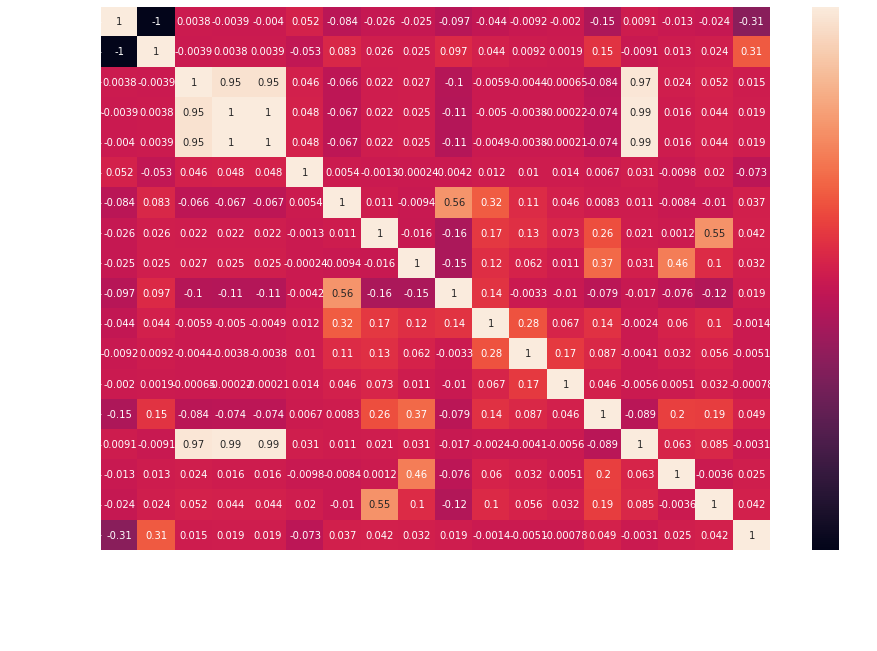

In [176]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(new_collisions.corr(), annot=True)